STEP1: Loading the Dataset

In [1]:
import pandas as pd

file_path = 'pakwheels_used_car_data_v02.csv'  
df = pd.read_csv(file_path)
df.head()


C:\Users\Electrova\AppData\Local\Temp\ipykernel_37532\3606638676.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


STEP 2: Preprocessing the dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np

# Drop the 'assembly' column due to too many missing values
df.drop(columns=['assembly'], inplace=True)

# Impute missing values for various columns
# Fill missing values in 'body' with the most frequent value (mode)
df['body'].fillna(df['body'].mode()[0], inplace=True)
# Fill missing values in 'year' with the median value
df['year'].fillna(df['year'].median(), inplace=True)
# Fill missing values in 'fuel' with the most frequent value (mode)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
# Fill missing values in 'color' with the most frequent value (mode)
df['color'].fillna(df['color'].mode()[0], inplace=True)
# Fill missing values in 'engine' with the median value
df['engine'].fillna(df['engine'].median(), inplace=True)

# Drop rows where 'price' (target variable) is missing
df.dropna(subset=['price'], inplace=True)

# Display the first 10 rows of the DataFrame to verify changes
df.head(10)


C:\Users\Electrova\AppData\Local\Temp\ipykernel_37532\1878711455.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].fillna(df['body'].mode()[0], inplace=True)
C:\Users\Electrova\AppData\Local\Temp\ipykernel_37532\1878711455.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

,addref,city,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0
5,7943736,Vehari,Sedan,Honda,Civic,2010.0,1300.0,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000.0
6,7764683,Islamabad,Hatchback,Suzuki,Swift,2019.0,1300.0,Manual,Petrol,Grey,Islamabad,45000,2675000.0
7,7943739,Faisalabad,Sedan,Honda,City,2018.0,1300.0,Automatic,Petrol,Maroon,Lahore,187000,3450000.0
8,7894559,Lahore,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000.0
9,7943724,Lahore,Sedan,Honda,City,2014.0,1300.0,Manual,Petrol,Crystal Black Pearl,Lahore,110000,2585000.0


Conversion from categorical to numerical variables

In [3]:
# Convert categorical variables to numerical variables
categorical_cols = ['city', 'body', 'make', 'model', 'transmission', 'fuel', 'color', 'registered']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,addref,year,engine,mileage,price,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
0,7943732,2013.0,1300.0,145000,2870000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7730314,2000.0,1300.0,230000,995000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7943737,2021.0,1300.0,60500,3585000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7943733,2017.0,1300.0,87000,2250000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7923484,2017.0,1800.0,86000,4850000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Standardization

In [4]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['year', 'engine', 'mileage', 'price']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,addref,year,engine,mileage,price,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
0,7943732,0.011167,-0.148201,0.598570,-0.175925,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7730314,-1.766629,-0.148201,1.549163,-0.501478,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7943737,1.105196,-0.148201,-0.346432,-0.051781,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7943733,0.558182,-0.148201,-0.050070,-0.283575,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7923484,0.558182,0.567041,-0.061254,0.167858,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Convert all boolean columns to 1 and 0
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.replace({'True': 1, 'False': 0}, inplace=True)

In [6]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']


STEP3: Splittings the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP4: Data Visualization

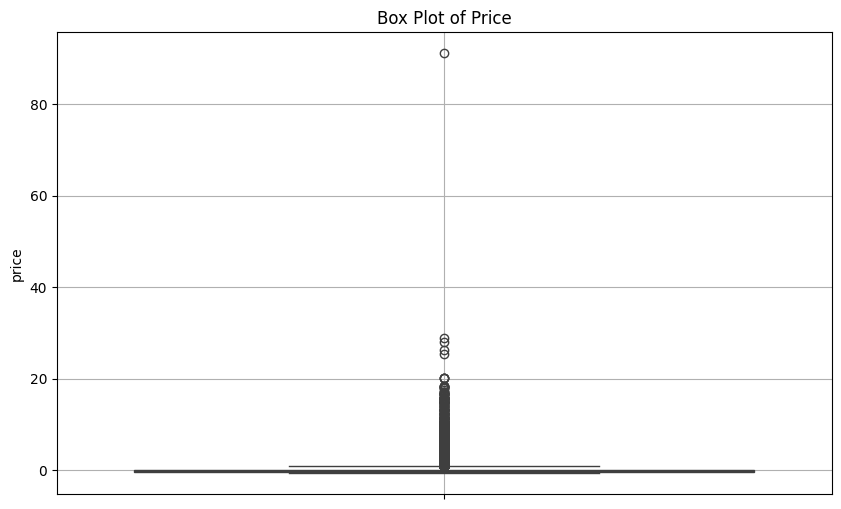

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(df_encoded['price'])
plt.title('Box Plot of Price')
plt.grid(True)
plt.show()



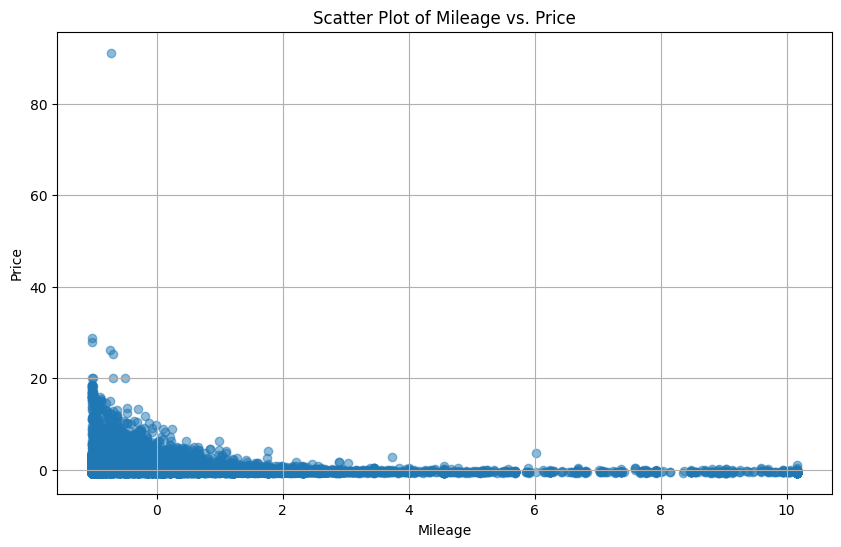

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['mileage'], df_encoded['price'], alpha=0.5)
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

STEP5: ML models:
- Decision Tree
- Support Vector Machine 
- Linear Regression 

In [11]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression MSE: {mse_dt}")
print(f"Decision Tree Regression R2: {r2_dt}")

Decision Tree Regression MSE: 0.17001194627535163
Decision Tree Regression R2: 0.802892679073295


Support Vector Machine

In [ ]:
# Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression MSE: {mse_svr}")
print(f"Support Vector Regression R2: {r2_svr}")

Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")


Linear Regression MSE: 0.27102339556003385
Linear Regression R2: 0.6857826959949234


### Models comparison:
All the models have been trained and tested on the same dataset. Depending upon the least error Decission Tree is working most efficient by giving the least error which means good efficency 

### Reasons for choosing these models


- Decision Tree: Decision Trees can capture non-linear relationships between the features and the target variable, which Linear Regression cannot.

- Support Vector Machine: SVR can handle both linear and non-linear relationships through the use of different kernel functions (e.g., linear, polynomial, radial basis function).
  
- Linear RTegression: Linear Regression is easy to implement and interpret. The model assumes a linear relationship between the input variables (features) and the target variable (price), making it straightforward to understand the impact of each feature.
